NameError: name 'pylab' is not defined

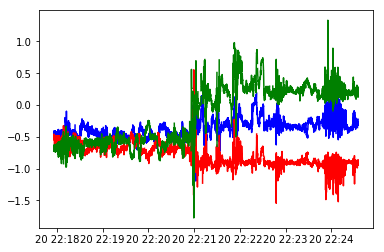

In [4]:
#This produces all graphs and maps for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import*
import gmplot

for i in range(25):
    #producing accelerometer graphs
    data=pd.read_csv('/Users/empathybroker/Downloads/Data Science Challenge/all journeys/'+str(i+1)+'.csv')
    data['date']=data['timestamp'].values.astype('datetime64[ms]')
    plt.plot(data['date'],data['x'],'b')
    plt.plot(data['date'],data['y'],'r')
    plt.plot(data['date'],data['z'],'g')
    #plt.show()
    pylab.savefig('accelerator'+str(i+1)+'.png')
    plt.gcf().clear()
    #producing GPS maps
    latlon=data[data['type']=='gps']
    lat=latlon['lat'].values #np series of latitude to map
    lon=latlon['lon'].values
    sep=int(len(lat)/2)
    lat1=lat[:sep]
    lat2=lat[sep:]
    lon1=lon[:sep]
    lon2=lon[sep:]
    gmap=gmplot.GoogleMapPlotter(latlon.iloc[0]['lat'],latlon.iloc[0]['lon'],13)
    gmap.plot(lat1,lon1,'cornflowerblue',edge_width=3)
    gmap.draw(str(i+1)+'map1.html')
    gmap=gmplot.GoogleMapPlotter(latlon.iloc[sep]['lat'],latlon.iloc[sep]['lon'],13)
    gmap.plot(lat2,lon2,'cornflowerblue',edge_width=3)
    gmap.draw(str(i+1)+'map2.html')
    #producing speed graphs
    plt.plot(latlon['date'],latlon['speed'])
    pylab.savefig('speed'+str(i+1)+'.png')
    plt.gcf().clear()
    
    acc=[(latlon.iloc[i+1]['speed']-latlon.iloc[i]['speed'])/
    ((latlon.iloc[i+1]['timestamp']-latlon.iloc[i]['timestamp'])/1000) for i in range(len(latlon)-1)]
    acc=np.insert(acc,0,0)
    latlon['acceleration']=acc
    plt.plot(latlon['timestamp'],latlon['acceleration'])
    pylab.savefig('acceleration'+str(i+1)+'.png')
    plt.gcf().clear()